In [7]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None
    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y
        return out
    def backward(self, dout):
        dx = dout * self.y #x와 y를 바꾼다.
        dy = dout * self.x
        return dx, dy

In [8]:
apple = 100
apple_num = 2
tax = 1.1 

#계층들 
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

#순전파 
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(price) 


220.00000000000003


In [4]:
#역전파 
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(dapple, dapple_num, dapple_price, dtax)

2.2 110.00000000000001 1.1 200


In [9]:
class AddLayer:
    def __init__(self):
        pass
    def forward(self, x, y):
        out = x + y
        return out 
    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        return dx, dy 



In [15]:
#buy_apple_orange.py 
apple = 100
apple_num = 2
orange = 150 
orange_num = 3
tax = 1.1 
#계층들 
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

#순전파 
apple_price = mul_apple_layer.forward(apple, apple_num) #(1)
orange_price = mul_orange_layer.forward(orange, orange_num) #(2)
all_price = add_apple_orange_layer.forward(apple_price, orange_price) #(3)
price = mul_tax_layer.forward(all_price, tax) #(4)

#역전파 
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice) #(4)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)
print(price)

715.0000000000001


In [16]:
print(dapple_num, dapple, dorange_num, dorange, dapple_price, dorange_price, dtax, dprice)

110.00000000000001 2.2 165.0 3.3000000000000003 1.1 1.1 650 1


In [17]:
class Relu:
    def __init__(self):
        self.mask = None
    def forward(self, x):
        self.mask = (x<=0)
        out = x.copy()
        out[self.mask] = 0
        return out
    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        return dx


In [19]:
import numpy as np 
x = np.array([[1.0, -0.5], [-2.0, 3.0]])
print(x)

[[ 1.  -0.5]
 [-2.   3. ]]


In [20]:
mask = (x <= 0)

In [21]:
print(mask)

[[False  True]
 [ True False]]


In [22]:
class Sigmoid:
    def __init__(self):
        self.out = None
    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out
    def backward(self, dout):
        dx = dout* (1.0 - self.out) * self.out
        return dx



In [2]:
import numpy as np 
X_dot_W = np.array([[0, 0, 0], [10, 10, 10]])
B = np.array([1, 2, 3])
X_dot_W

array([[ 0,  0,  0],
       [10, 10, 10]])

In [3]:
X_dot_W + B

array([[ 1,  2,  3],
       [11, 12, 13]])

In [4]:
dY = np.array([[1, 2, 3], [4, 5, 6]])
dY

array([[1, 2, 3],
       [4, 5, 6]])

In [5]:
dB = np.sum(dY, axis = 0)
dB 

array([5, 7, 9])

In [7]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None
    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W_ )+ self.b
        return out
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis = 0)
        return dx

In [8]:
class SoftMaxWithLoss:
    def __init__(self):
        self.loss = None #손실 
        self.y = None #softmaxx의 출력 
        self.t = None #정답 레이블(원 핫 벡터)
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size
        return dx

In [7]:
import sys, os 
sys.path.append(os.pardir)
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient 
from collections import OrderedDict

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, 
                 weight_init_std = 0.01):
        #가중치 초기화 
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        #계층 생성 
        self.layers = OrderedDict()
        self.layers['Affine1'] = \
            Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = \
            Affine(self.params['W2'], self.params['b2'])
        self.lastLayer = SoftmaxWithLoss()
        def predict(self, x):
            for layer in self.layers.values():
                x = layer.forward(x)
            return x
        def loss(self, x, t):
            y = self.predict(x)
            y = np.argmax(y, axis =1)
            if t.ndim != 1 : t = np.argmax(t, axis = 1)
            accuracy = np.sum(y==t) / float(x.shape[0])
            return accuracy
        def numerical_gradient(self, x, t):
            loss_W = lambda W: self.loss(x, t)
            grads = {}
            grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
            grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
            grads['W2'] = numercial_gradient(loss_W, self.params['W2'])
            grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
            return grads
        def gradient(self, x, t):

            #순전파 
            self.loss(x, t)
            #역전파 
            dout = 1
            dout.lastlayer.backward(dout)
            layers = list(self.layers.values())
            layers.reverse()
            for layer in layers:
                dout = layer.backward(dout)
            #결과 저장 
            grads = {}
            grads['W1'] = self.layers['Affine1'].dW
            grads['b1'] = self.layers['Affine1'].db
            grads['W2'] = self.layers['Affine2'].dW
            grads['b2'] = self.layers['Affine2'].db
            return grads

In [29]:
import sys, os
sys.path.append(os.pardir)
import numpy as np 
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import os.path
import gzip
import pickle
import os
import numpy as np


url_base = 'https://storage.googleapis.com/cvdf-datasets/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

dataset_dir = dataset_dir = os.getcwd()
save_file = dataset_dir + "/mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784


def _download(file_name):
    file_path = dataset_dir + "/" + file_name
    
    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    urllib.request.urlretrieve(url_base + file_name, file_path)
    print("Done")
    
def download_mnist():
    for v in key_file.values():
       _download(v)
        
def _load_label(file_name):
    file_path = dataset_dir + "/" + file_name
    
    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")
    
    return labels

def _load_img(file_name):
    file_path = dataset_dir + "/" + file_name
    
    print("Converting " + file_name + " to NumPy Array ...")    
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print("Done")
    
    return data
    
def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])    
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])
    
    return dataset

def init_mnist():
    download_mnist()
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done!")

def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
        
    return T
    

def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """MNIST 데이터셋 읽기
    
    Parameters
    ----------
    normalize : 이미지의 픽셀 값을 0.0~1.0 사이의 값으로 정규화할지 정한다.
    one_hot_label : 
        one_hot_label이 True면、레이블을 원-핫(one-hot) 배열로 돌려준다.
        one-hot 배열은 예를 들어 [0,0,1,0,0,0,0,0,0,0]처럼 한 원소만 1인 배열이다.
    flatten : 입력 이미지를 1차원 배열로 만들지를 정한다. 
    
    Returns
    -------
    (훈련 이미지, 훈련 레이블), (시험 이미지, 시험 레이블)
    """
    if not os.path.exists(save_file):
        init_mnist()
        
    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)
    
    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0
            
    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])    
    
    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label']) 


if __name__ == '__main__':
    init_mnist()
from two_layer_net import TwoLayerNet


Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [32]:
(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize = True, one_hot_label = True)

In [33]:
network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size= 10)
x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

#각 가중치의 차이에 절대값을 구한뒤 그 절대값의 평균을 구한다. 
for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]))
    print(key + ":" + str(diff))

W1:4.388440509418474e-10
b1:2.536728011637117e-09
W2:7.41077352665214e-09
b2:1.3996969393526016e-07


In [45]:
import sys, os
if os.getcwd() not in sys.path:
    sys.path.append(os.getcwd())

# 2) 모듈 import & reload
import importlib
from dataset import mnist       # 또는: import dataset.mnist as mnist
importlib.reload(mnist)

# 3) url_base가 바뀌었는지 확인
print("현재 url_base =", repr(mnist.url_base))

# 4) 강제 다운로드 시도
mnist.init_mnist()    # 강제로 다시 다운로드

현재 url_base = 'https://storage.googleapis.com/cvdf-datasets/mnist/'
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [54]:
import sys, os
sys.path.append(os.pardir)
import numpy as np 
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

#데이터 읽기 
(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize = True, one_hot_label = True)
network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []
iter_per_epoch = max(train_size/ batch_size, 1)
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    #오차 역전파 법으로 기울기를 구한다. 
    grad = network.gradient(x_batch, t_batch)
    #갱신 
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)

0.12761666666666666 0.1282
0.9065166666666666 0.9101
0.9256833333333333 0.9268
0.9387166666666666 0.938
0.9476166666666667 0.9446
0.95385 0.9505
0.9585833333333333 0.9553
0.9624833333333334 0.9573
0.9650166666666666 0.9615
0.9674166666666667 0.962
0.9684666666666667 0.962
0.97115 0.9636
0.9717666666666667 0.9638
0.97605 0.9677
0.9757 0.9688
0.9779 0.9685
0.9789666666666667 0.9696


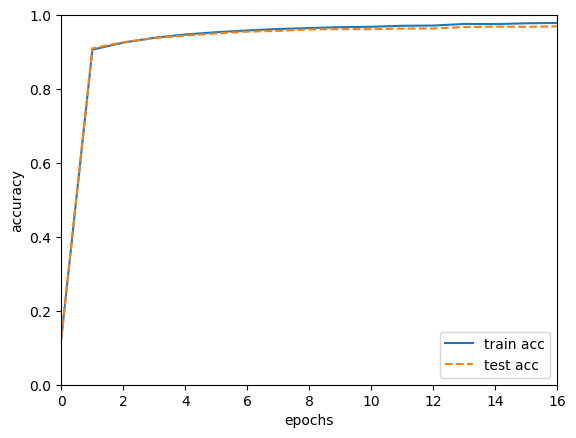

In [64]:
import matplotlib.pyplot as plt

x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.xlim(0, 16)
plt.legend(loc='lower right')
plt.show()